<a href="https://colab.research.google.com/github/deadmoto/spellbook/blob/master/python/notebooks/mnist_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --quiet tensorflow==2.0.0

In [2]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

2.0.0


In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dropout(0.2),
  Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


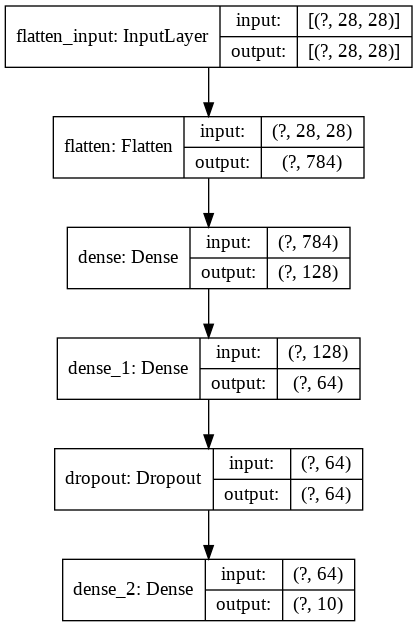

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [0]:
model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [7]:
earlystopping = EarlyStopping(patience=2)
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[earlystopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 107us/sample - loss: 0.3176 - accuracy: 0.9061 - val_loss: 0.1322 - val_accuracy: 0.9611
Epoch 2/20
48000/48000 [==============================] - 4s 91us/sample - loss: 0.1325 - accuracy: 0.9601 - val_loss: 0.1119 - val_accuracy: 0.9674
Epoch 3/20
48000/48000 [==============================] - 4s 91us/sample - loss: 0.0948 - accuracy: 0.9711 - val_loss: 0.0955 - val_accuracy: 0.9698
Epoch 4/20
48000/48000 [==============================] - 4s 92us/sample - loss: 0.0724 - accuracy: 0.9781 - val_loss: 0.1011 - val_accuracy: 0.9684
Epoch 5/20
48000/48000 [==============================] - 4s 93us/sample - loss: 0.0568 - accuracy: 0.9815 - val_loss: 0.0854 - val_accuracy: 0.9752
Epoch 6/20
48000/48000 [==============================] - 4s 93us/sample - loss: 0.0491 - accuracy: 0.9845 - val_loss: 0.0980 - val_accuracy: 0.9719
Epoch 7/20
48000/48000 [==============================]

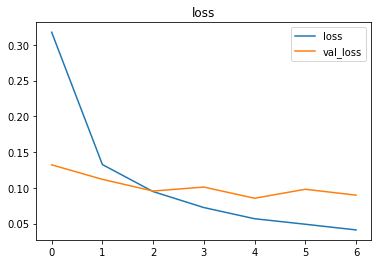

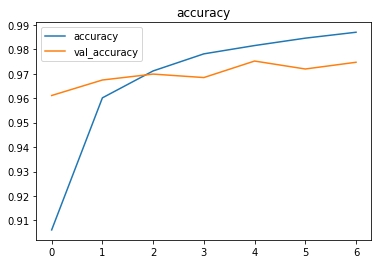

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('loss')
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('accuracy')
plt.show()

In [9]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 1s - loss: 0.0400 - accuracy: 0.9768


[0.08000320261948218, 0.9768]